In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv("C:/Users/Matus/OneDrive/Desktop/analysis/Video_games/data/vgsales.csv")

In [95]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [96]:
df_GL_sales_mean = df["Global_Sales"].mean()
df_EU_sales_mean = df["EU_Sales"].mean()
df_JP_sales_mean = df["JP_Sales"].mean()
df_NA_sales_mean = df["NA_Sales"].mean()
df_OT_sales_mean = df["Other_Sales"].mean()

print("Global Sales mean: ",df_GL_sales_mean)
print("EU Sales mean: ",df_EU_sales_mean)
print("JP Sales mean: ",df_JP_sales_mean)
print("NA Sales mean: ",df_NA_sales_mean)
print("Other Sales mean: ",df_OT_sales_mean)

Global Sales mean:  0.5374406555006628
EU Sales mean:  0.14665200626581515
JP Sales mean:  0.077781660441017
NA Sales mean:  0.26466742981082064
Other Sales mean:  0.0480630196409206


In [97]:
df_grouped_by_genre = df.groupby("Genre")["Global_Sales"].agg("sum")
df_grouped_by_genre.sort_values(ascending=False, inplace=True)

df_grouped_by_genre

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64

Nintendo            1184.95
Electronic Arts     1008.41
Activision           677.10
Ubisoft              465.19
Other_Publishers    4821.38
dtype: float64


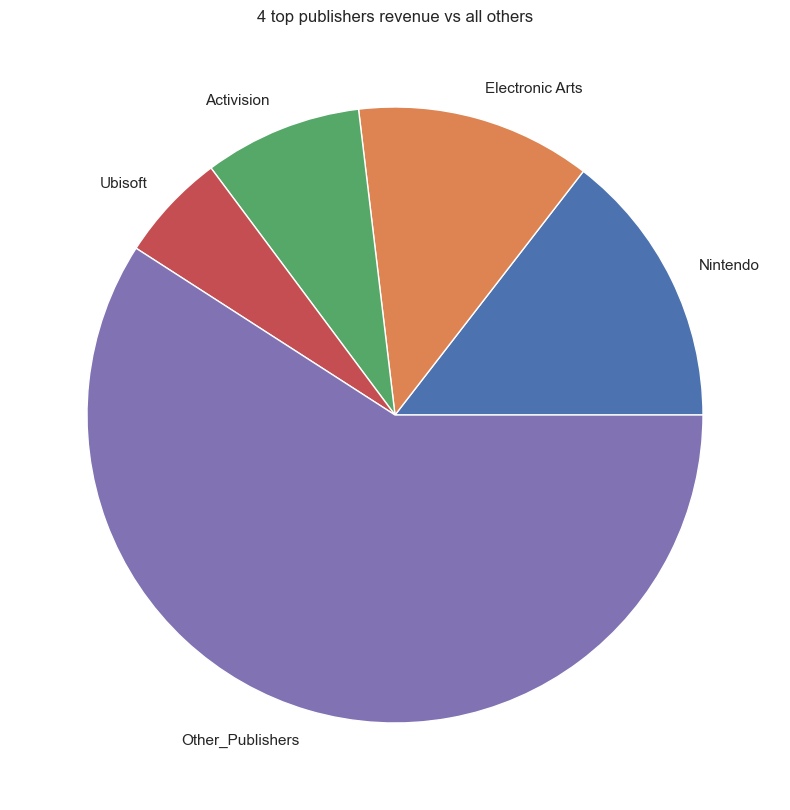

In [104]:
# which publisher had Biggest Global sales at each year?
#Getting top 10 publishers by ammount of developed games of all time
#t10_pub = df["Publisher"].value_counts().head(10)

# Getting top Global sales genre of all time
filt = df["Year"] >= 2000
top_sales_mil = df.loc[filt]
top_sales_genre = top_sales_mil.groupby("Publisher")["Global_Sales"].agg('sum') 
top_sales_genre.sort_values(ascending=False, inplace=True)

# Top 10 publishers, by ammount of developed games
t5_pub = top_sales_genre.head(4)
#print(t5_pub)
#print(type(t5_pub))
#print(t10_pub)

top5_genre = top_sales_genre.index[:4]

# Filter rows where Genre is NOT in the top 5 genres
others = df.loc[~df["Publisher"].isin(top5_genre)]

# Sum the Global_Sales for all other genres
others_sales_sum = others["Global_Sales"].sum()
other_sales_series = pd.Series(index=["Other_Publishers"],data=others_sales_sum)

joined_series = pd.concat([t5_pub,other_sales_series])
print(joined_series)
#print("Sum of global sales for all genres except top 5:", others_sales_sum)

fig = plt.figure(figsize =(18, 10)) 
plt.title("4 top publishers revenue vs all others")
plt.pie(joined_series.values,labels=joined_series.index)
plt.show()

In [101]:
def year_change():
    
    '''
    # unpacking trought= unpacking operator '*'
    years_list = [*range(2006,2012,1)]
    # print(years_list)
    changes = []
    counter = 1
    
    '''
    # unpacking with extend()
    years_list = []
    
    start,end = 2006, 2012
    
    if start < end:
        # unpack the result 
        years_list.extend(range(start,end))
        # Append the last value 
        years_list.append(end) 
    
    for year in years_list:
        # Getting new dataframe with filtered results
        filt = df["Year"] == year
        df_y = df.loc[filt]
        
        # Getting top Global sales genre of all time for current year
        top_sales_genre = df_y.groupby("Genre")["Global_Sales"].agg('sum')
        
        # Sorting values in descending order
        top_sales_genre.sort_values(ascending=False, inplace=True)
        
        #printing results
        print("Global_Sales for year",str(year))
        print(top_sales_genre)
        #changes.append(top_sales_genre.values[0])
        print("-----\n-----")
    
    '''for year in years_list:
        filt = df["Year"] == year
        df_y = df.loc[filt]

        # Getting top Global sales genre of all time
        top_sales_genre = df_y.groupby("Genre")["Global_Sales"].agg('sum')
        top_sales_genre.sort_values(ascending=False, inplace=True)
        
        print("Global_Sales for year",str(year))
        print(top_sales_genre.index[0], ": ", top_sales_genre.values[0])
        print("Over year change on first place: ",top_sales_genre.values[0] - changes[counter])
        print("-----")
        counter += 1
        '''
        
#year_change()

## How was all time sales from all regions?

In [102]:
# Get all time sales, from all regions
all_time_sales = df.agg({"NA_Sales": "sum", "EU_Sales":"sum", "JP_Sales":"sum", "Other_Sales":"sum"})

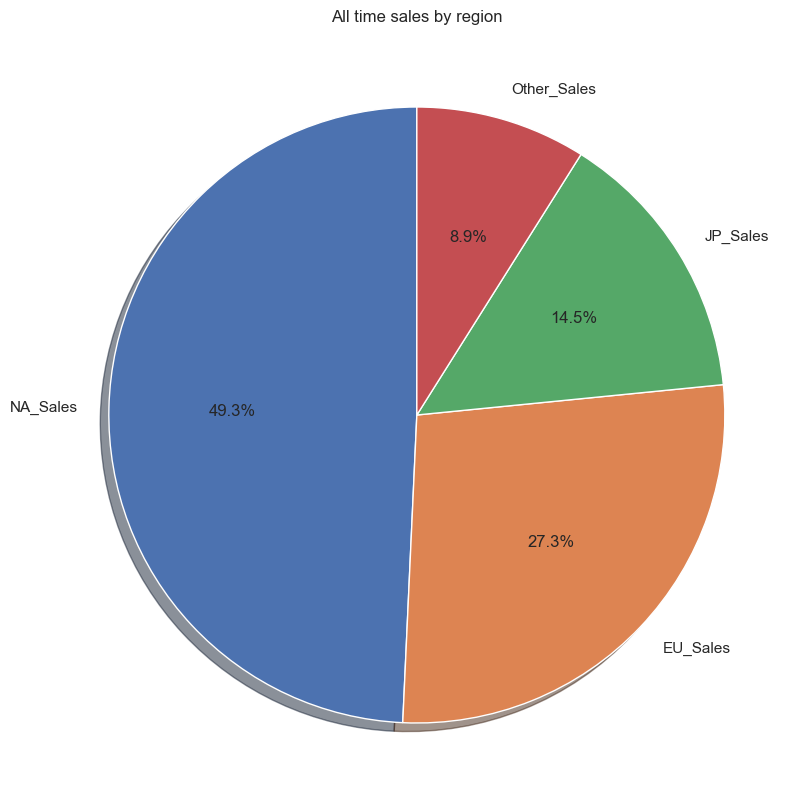

In [103]:
fig = plt.figure(figsize =(18, 10)) 
plt.title("All time sales by region")
plt.pie(all_time_sales.values,labels=all_time_sales.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

(array([5.500e+01, 5.300e+01, 2.800e+01, 3.700e+01, 3.200e+01, 5.700e+01,
        1.030e+02, 3.400e+02, 5.520e+02, 7.170e+02, 8.310e+02, 1.604e+03,
        1.704e+03, 2.210e+03, 2.859e+03, 2.398e+03, 1.203e+03, 1.196e+03,
        3.470e+02, 1.000e+00]),
 array([1980., 1982., 1984., 1986., 1988., 1990., 1992., 1994., 1996.,
        1998., 2000., 2002., 2004., 2006., 2008., 2010., 2012., 2014.,
        2016., 2018., 2020.]),
 <BarContainer object of 20 artists>)

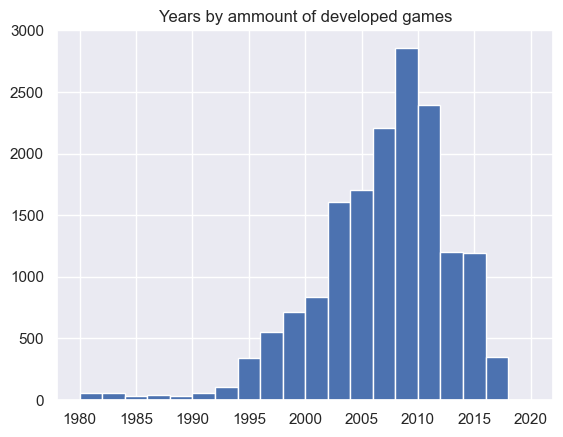

In [105]:
plt.title("Years by ammount of developed games")
plt.hist(df["Year"],bins=20)

## 1. What genre games have been made the most?

In [12]:
df["Genre"].value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

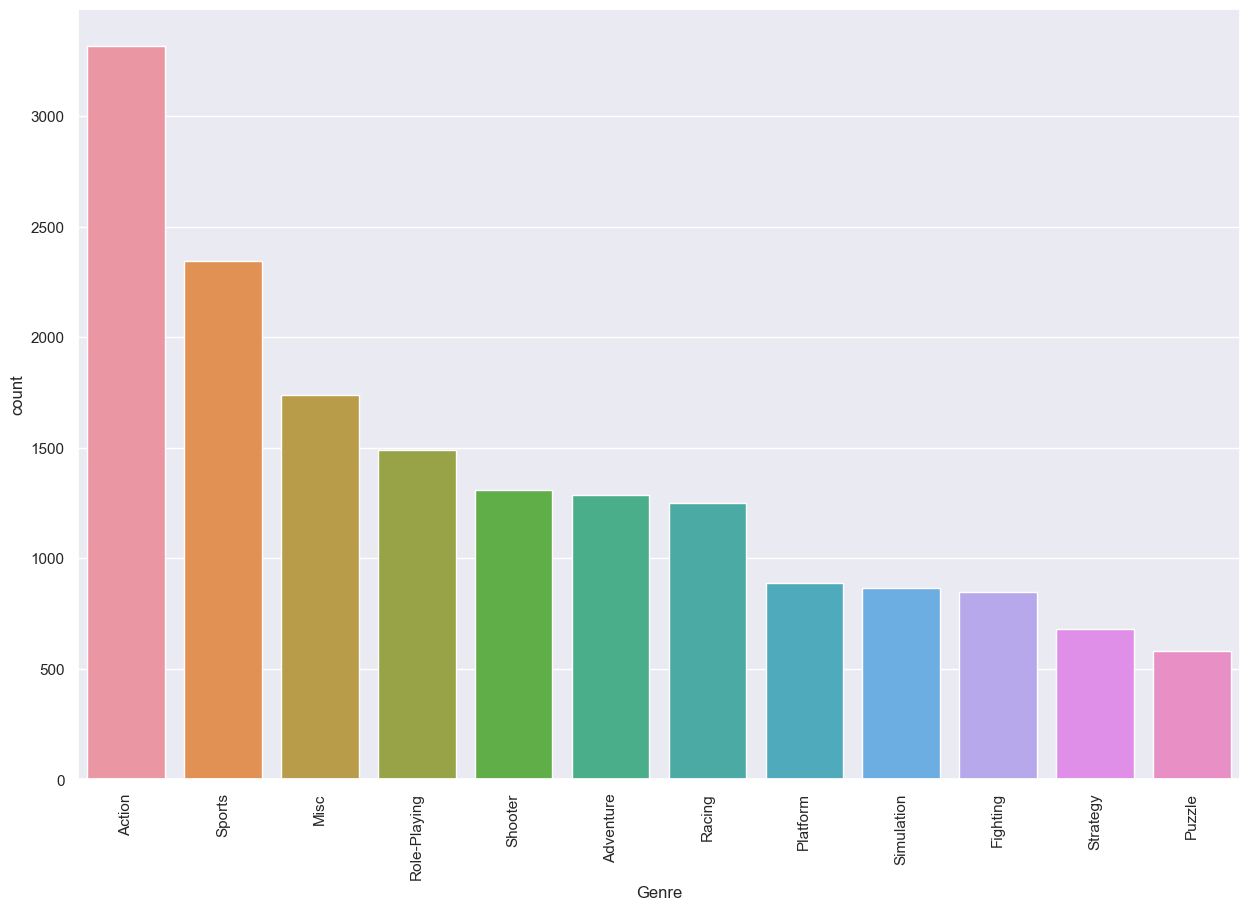

In [106]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre",data=df,order = df['Genre'].value_counts().index)
plt.xticks(rotation=90)

## 2. Which year had the most game release?

In [107]:
df["Year"].value_counts()

Year
2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0'),
  Text(5, 0, '2006.0'),
  Text(6, 0, '2005.0'),
  Text(7, 0, '2002.0'),
  Text(8, 0, '2003.0'),
  Text(9, 0, '2004.0'),
  Text(10, 0, '2012.0'),
  Text(11, 0, '2015.0'),
  Text(12, 0, '2014.0'),
  Text(13, 0, '2013.0'),
  Text(14, 0, '2001.0'),
  Text(15, 0, '1998.0'),
  Text(16, 0, '2000.0'),
  Text(17, 0, '2016.0'),
  Text(18, 0, '1999.0'),
  Text(19, 0, '1997.0'),
  Text(20, 0, '1996.0'),
  Text(21, 0, '1995.0'),
  Text(22, 0, '1994.0'),
  Text(23, 0, '1993.0'),
  Text(24, 0, '1981.0'),
  Text(25, 0, '1992.0'),
  Text(26, 0, '1991.0'),
  Text(27, 0, '1982.0'),
  Text(28, 0, '1986.0'),
  Text(29, 0, '1989.0'),
  Text(30, 0, '1983.0'),
  Text(31, 0, '1990.0'),
  Text(32, 0, '1987.0'),
  T

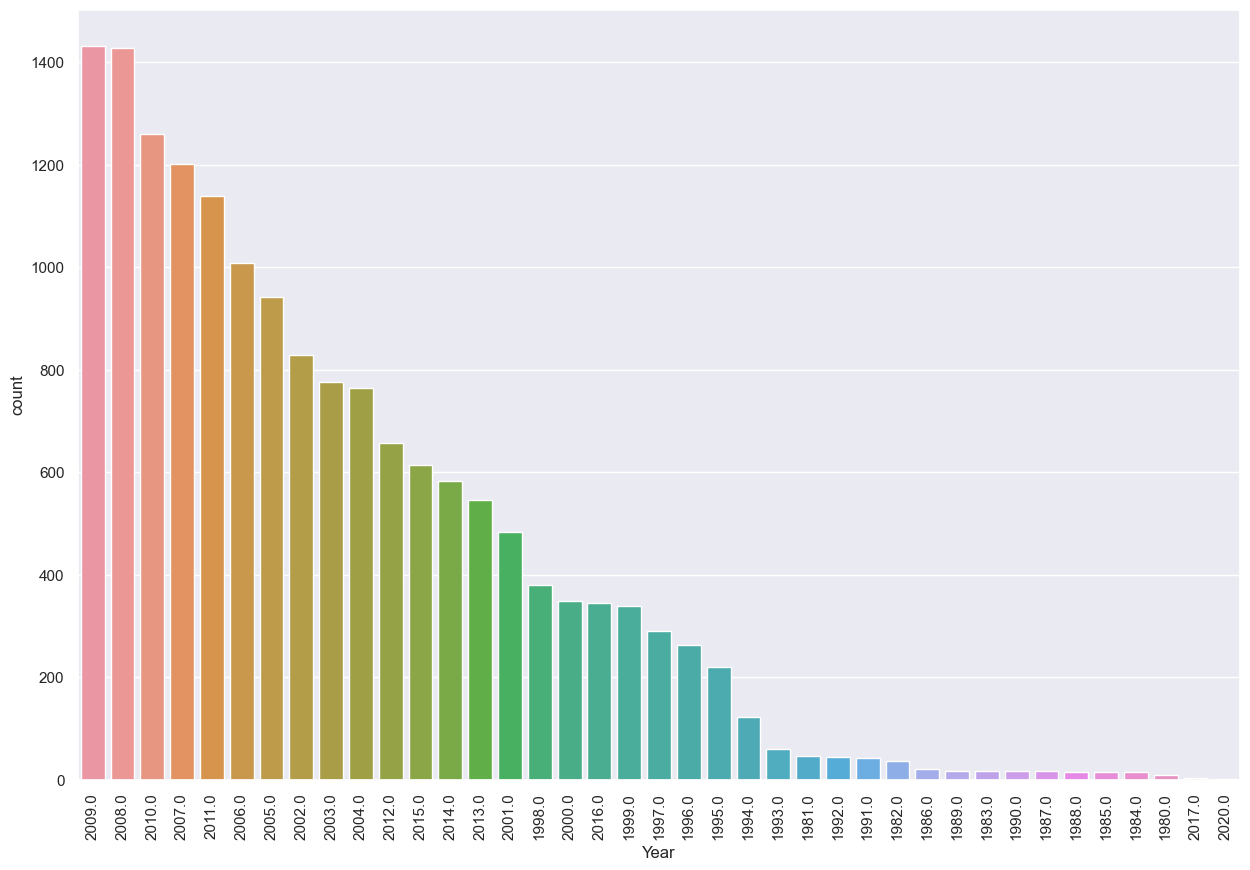

In [108]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year",data=df,order = df['Year'].value_counts().index)
plt.xticks(rotation=90)

## 10. Sales comparison by genre


In [109]:
comp_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
# comp_map

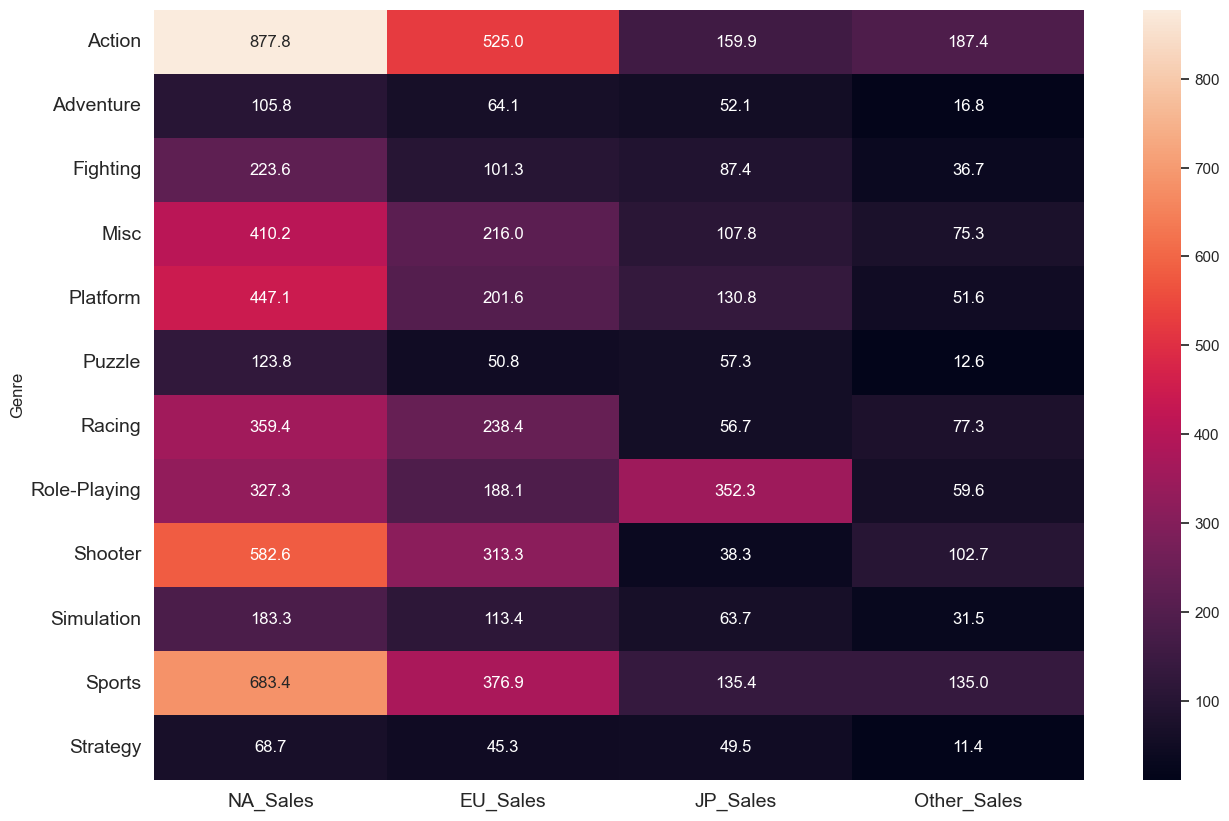

In [110]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Table with highest sales by region

In [111]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.sort_values(by="Sale_Price",ascending=False).head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,877.83
10,Sports,NA_Sales,683.35
8,Shooter,NA_Sales,582.60
12,Action,EU_Sales,525.00
4,Platform,NA_Sales,447.05


### Table with lowest sales by region

In [112]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.sort_values(by="Sale_Price",ascending=True).head()

,Genre,Sale_Area,Sale_Price
47,Strategy,Other_Sales,11.36
41,Puzzle,Other_Sales,12.55
37,Adventure,Other_Sales,16.81
45,Simulation,Other_Sales,31.52
38,Fighting,Other_Sales,36.68


### Top 10 publishers by Global_sales

In [113]:
top10_pub = df.groupby("Publisher")["Global_Sales"].sum()
top10_pub.sort_values(ascending=False,inplace=True)
top10_pub = top10_pub.head(10)
top10_pub

Publisher
Nintendo                        1786.56
Electronic Arts                 1110.32
Activision                       727.46
Sony Computer Entertainment      607.50
Ubisoft                          474.72
Take-Two Interactive             399.54
THQ                              340.77
Konami Digital Entertainment     283.64
Sega                             272.99
Namco Bandai Games               254.09
Name: Global_Sales, dtype: float64

<BarContainer object of 10 artists>

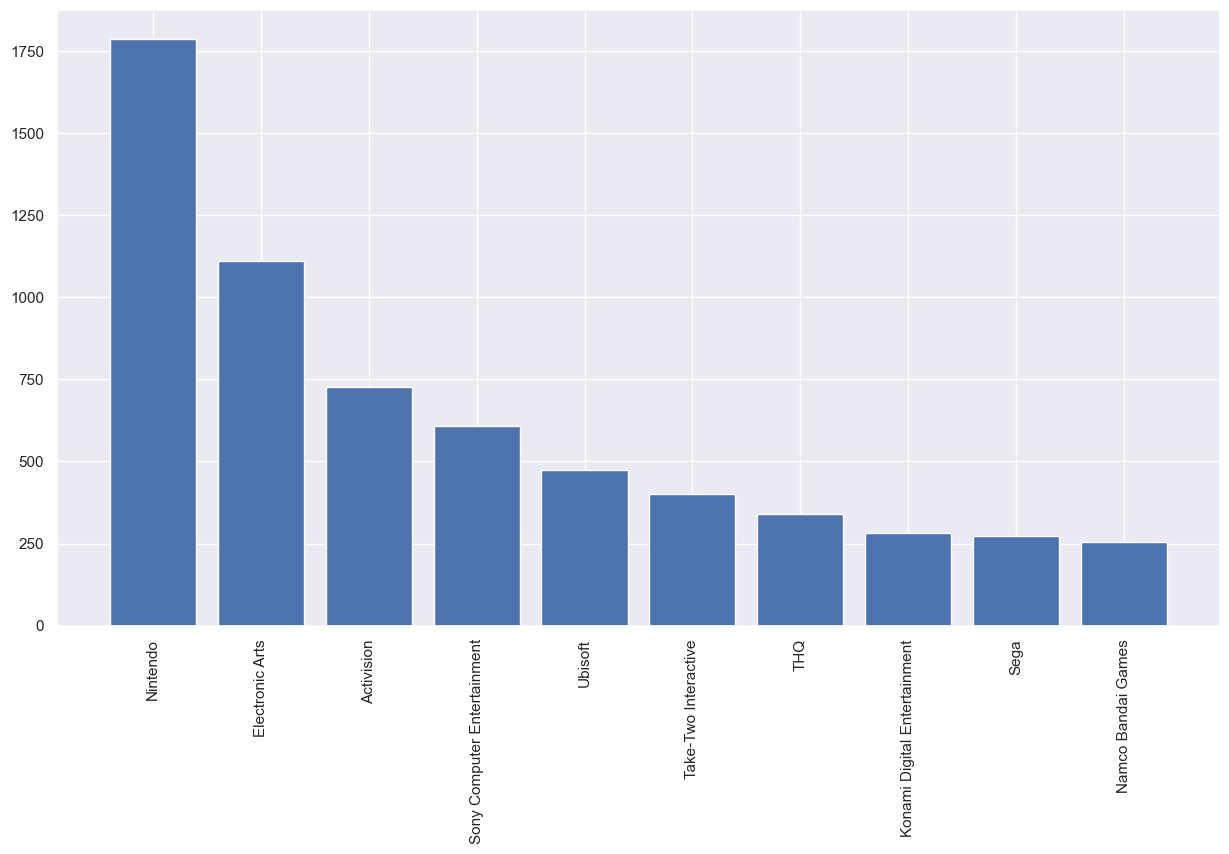

In [114]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.bar(x=top10_pub.index,height=top10_pub.values)

## Global sales of top 10 genre - every 3 years


Year:  [1980.0, 1981.0, 1982.0, 1983.0]
Genre
Action        24.56
Shooter       21.38
Platform      18.89
Puzzle        13.05
Misc           5.72
Sports         5.53
Racing         2.05
Fighting       0.77
Simulation     0.45
Adventure      0.40
Name: Global_Sales, dtype: float64

-------------



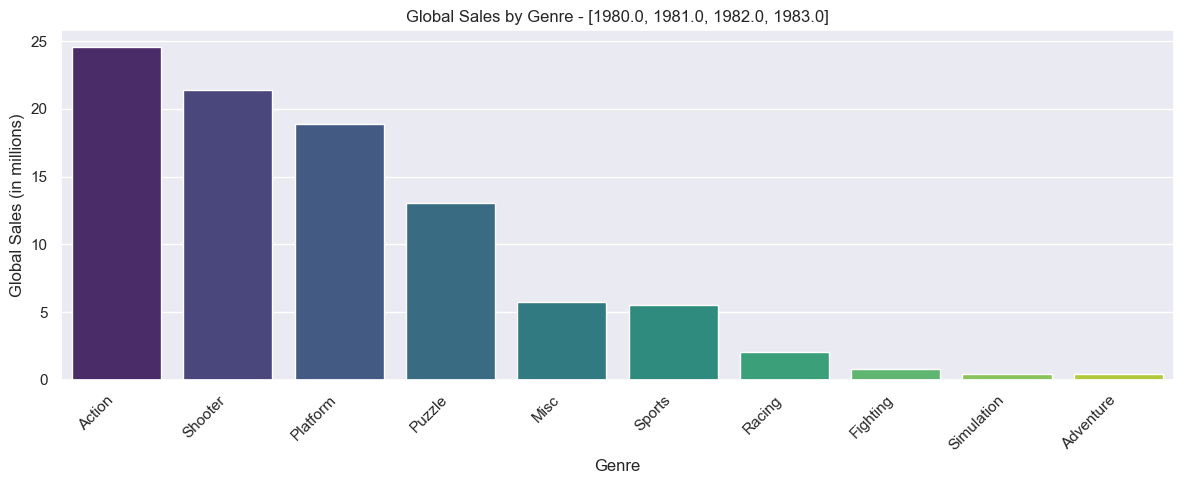


Year:  [1985.0, 1986.0, 1987.0]
Genre
Platform        54.30
Action          18.38
Sports          11.25
Role-Playing     7.17
Fighting         6.47
Shooter          5.60
Adventure        4.38
Puzzle           3.21
Racing           1.96
Simulation       0.03
Name: Global_Sales, dtype: float64

-------------



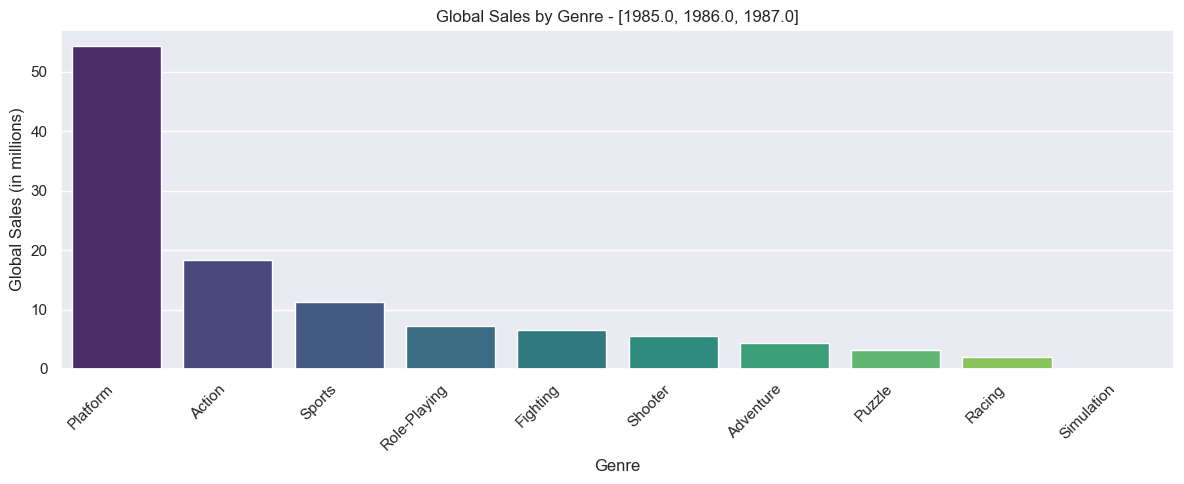


Year:  [1989.0, 1990.0, 1991.0]
Genre
Platform        51.27
Puzzle          46.99
Action          17.79
Sports          10.24
Role-Playing     9.97
Racing           7.40
Simulation       3.28
Shooter          3.20
Adventure        2.24
Misc             1.36
Strategy         0.94
Fighting         0.39
Name: Global_Sales, dtype: float64

-------------



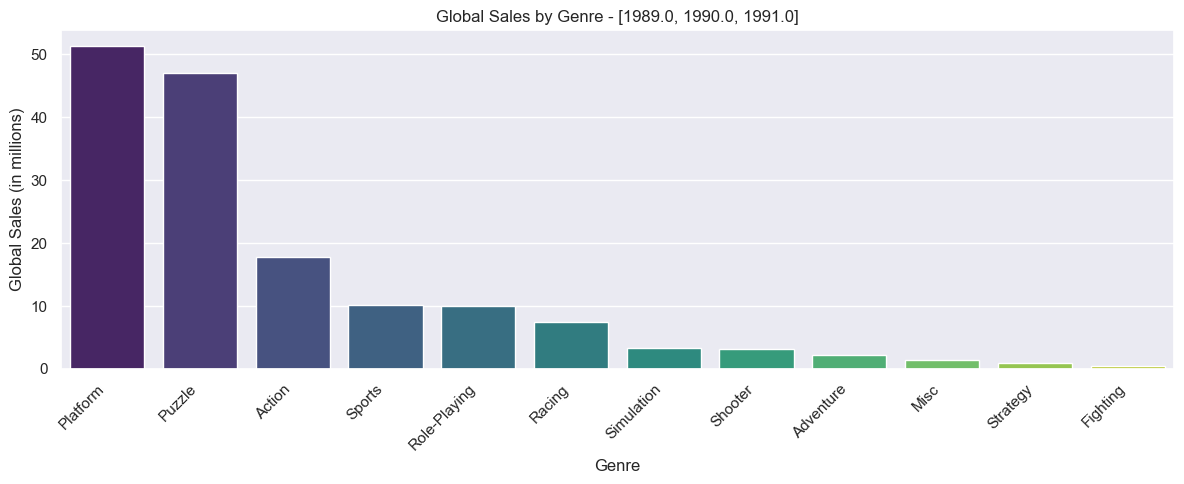


Year:  [1993.0, 1994.0, 1995.0]
Genre
Platform        64.10
Fighting        32.07
Role-Playing    26.96
Sports          19.55
Shooter         15.53
Strategy        10.88
Misc             9.56
Racing           8.64
Puzzle           7.41
Simulation       7.10
Action           6.93
Adventure        4.53
Name: Global_Sales, dtype: float64

-------------



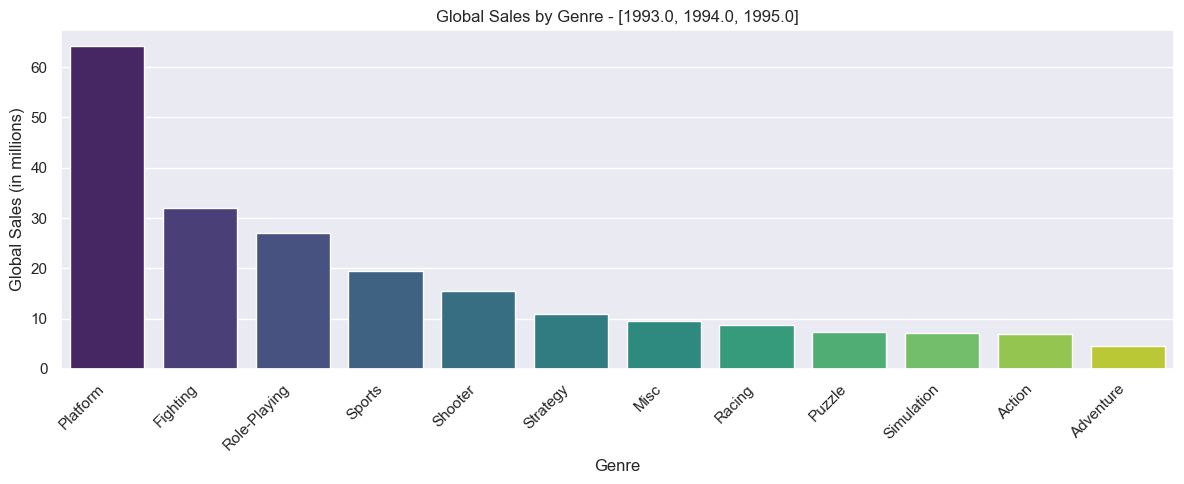


Year:  [1997.0, 1998.0, 1999.0]
Genre
Sports          102.10
Role-Playing     98.97
Racing           97.08
Action           94.80
Platform         72.55
Fighting         57.68
Shooter          44.22
Strategy         39.64
Misc             38.28
Simulation       28.20
Adventure        21.61
Puzzle           13.59
Name: Global_Sales, dtype: float64

-------------



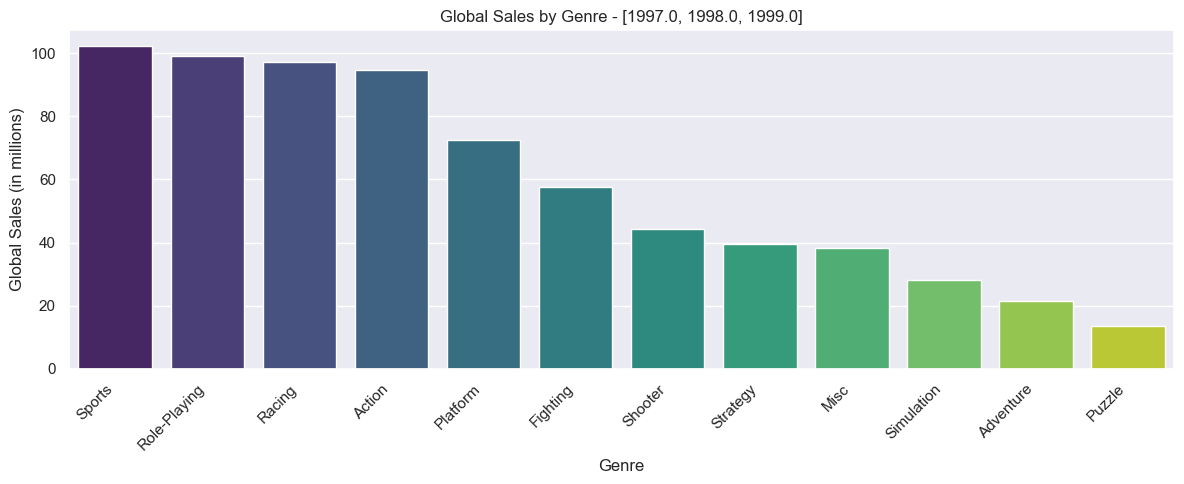


Year:  [2001.0, 2002.0, 2003.0]
Genre
Action          214.09
Sports          172.96
Racing          138.20
Platform        128.14
Shooter         100.49
Role-Playing     97.47
Fighting         66.87
Misc             55.89
Simulation       51.56
Adventure        22.31
Strategy         21.10
Puzzle           15.76
Name: Global_Sales, dtype: float64

-------------



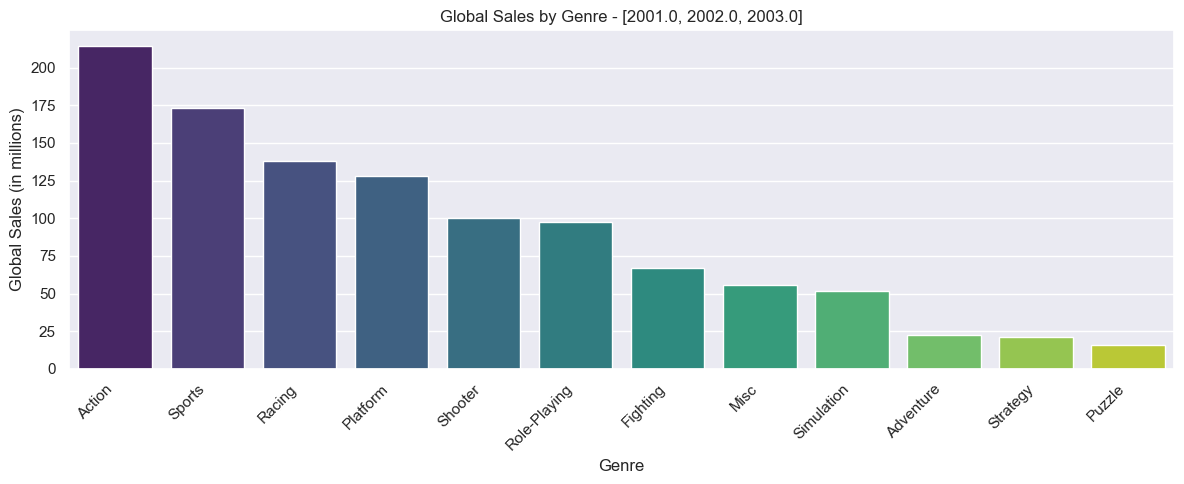


Year:  [2005.0, 2006.0, 2007.0]
Genre
Sports          293.90
Action          258.77
Misc            220.86
Shooter         151.01
Role-Playing    130.17
Racing          129.68
Simulation      120.01
Platform        108.95
Fighting         59.88
Puzzle           55.35
Adventure        44.47
Strategy         19.06
Name: Global_Sales, dtype: float64

-------------



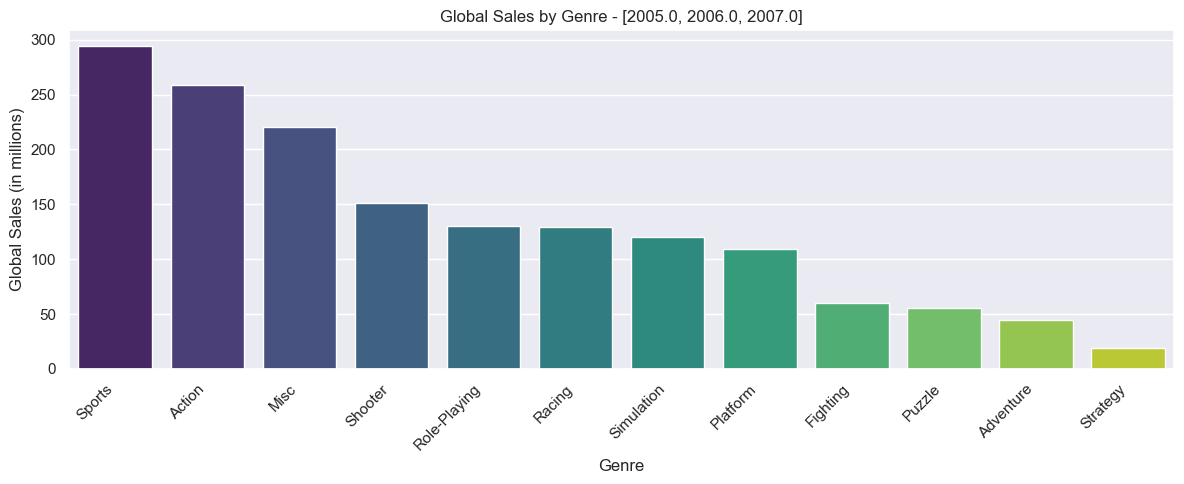


Year:  [2009.0, 2010.0, 2011.0]
Genre
Action          375.96
Sports          288.04
Shooter         246.66
Misc            229.88
Role-Playing    171.79
Racing          104.13
Platform        101.10
Simulation       71.14
Fighting         69.72
Adventure        53.23
Puzzle           36.60
Strategy         35.49
Name: Global_Sales, dtype: float64

-------------



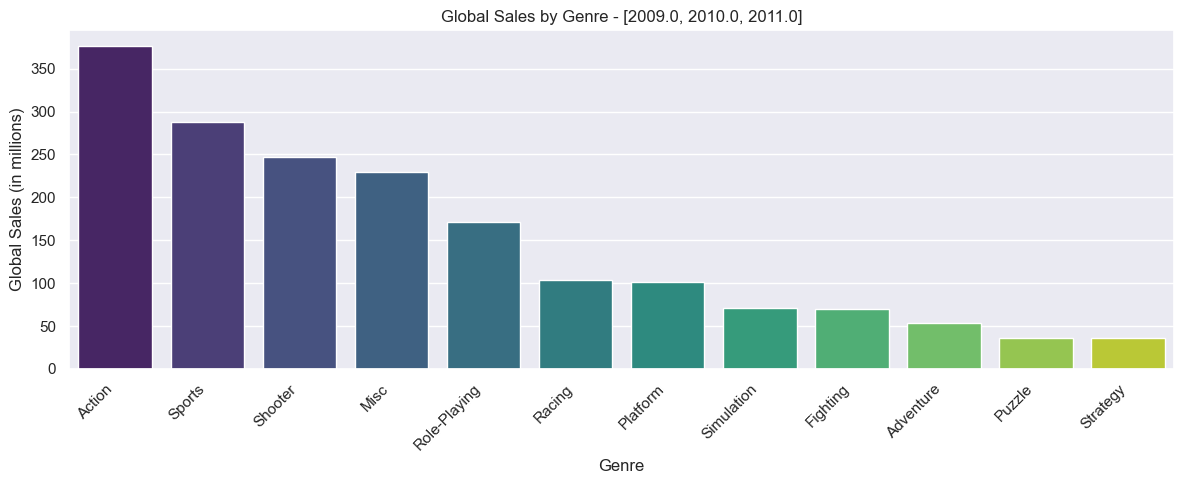


Year:  [2013.0, 2014.0, 2015.0]
Genre
Action          294.94
Shooter         194.95
Sports          129.75
Role-Playing    127.22
Misc             61.02
Platform         40.06
Racing           37.65
Fighting         31.14
Adventure        20.70
Simulation       19.84
Strategy          9.14
Puzzle            3.19
Name: Global_Sales, dtype: float64

-------------



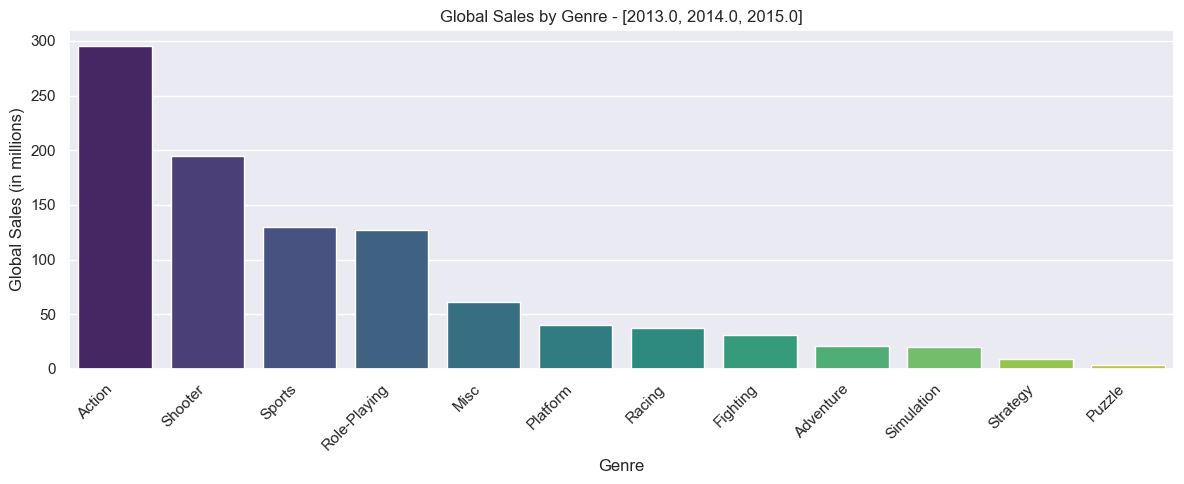

In [115]:
# Loop through each year in the years list
years_list = df["Year"].unique()
years_list.sort()
#print(years_list)

index = 0
last_3Y = []

for x in years_list:
    if (index % 4 == 0) & (index > 0):
        df_last_3Y = df[df["Year"].isin(last_3Y)]
        #print(df_last_3Y)
        # Group by Genre and sum the Global_Sales
        sum_years = df_last_3Y.groupby("Genre")["Global_Sales"].agg("sum").sort_values(ascending=False)

        # Print the year and the summed sales
        print("\nYear: ", last_3Y)
        print("=================")
        print(sum_years)
        print("\n-------------\n")
        
        # Plotting
        plt.figure(figsize=(12,5))
        sns.barplot(x=sum_years.index, y=sum_years.values, palette="viridis")
        plt.title(f"Global Sales by Genre - {last_3Y}")
        plt.xlabel('Genre')
        plt.ylabel('Global Sales (in millions)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()  # Adjust layout to avoid clipping
        plt.savefig(f"sales_3Y/sales_by_genre_by3_{last_3Y}.png")
        plt.show()
               
        last_3Y = []
    else:
        last_3Y.append(x)
    index += 1    
    
